# JHU covid-19 data analysis
Create log plots of cases and deaths per country, inspired by:  https://www.ft.com/coronavirus-latest 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates  
import numpy as np
from datetime import timedelta
from matplotlib.dates import date2num       #-->Update 

import JHUprocessing as jp

# import and merge data

In [2]:
path = r'D:\Code_projects\Covid19_analysis\COVID-19\csse_covid_19_data\csse_covid_19_time_series'
file_list = ['\\time_series_covid19_confirmed_global.csv',
         '\\time_series_covid19_deaths_global.csv',
         '\\time_series_covid19_recovered_global.csv'] 

df_country = jp.merge_data(path, file_list) 

# add column with day since 100 cases 

In [3]:
threshold_cases = 1e2
threshold_deaths = 25

last_day = df_country['Date'].max()
bool_last = df_country['Date'] == last_day
df_country.loc[bool_last,'Confirmed']  > threshold_cases 
countries = df_country['Country/Region'].unique() 
threshold_countries = []

for country in countries: 
    bool_country = df_country['Country/Region'] == country  
    df_temp = df_country[bool_country].copy()
    
    bool_threshold_cases = df_temp['Confirmed'] >= threshold_cases
    if bool_threshold_cases.sum() > 0: 
        day0 = df_temp.loc[bool_threshold_cases,'Date'].iloc[0]
        threshold_countries.append(country) 
    else: 
        day0 = last_day + timedelta(days=1) 

    newdays = (df_temp['Date'] - day0).dt.days  
    
    df_country.loc[bool_country,'Delta C'] = newdays
     
    
    bool_threshold_death = df_temp['Death'] >= threshold_deaths
    if bool_threshold_death.sum() > 0:
        day0 = df_temp['Date'][bool_threshold_death].iloc[0]
    else:
        day0 = last_day + timedelta(days=1) 
        
    newdays = (df_temp['Date'] - day0).dt.days 
    df_country.loc[bool_country,'Delta D'] = newdays 

# Plot countries

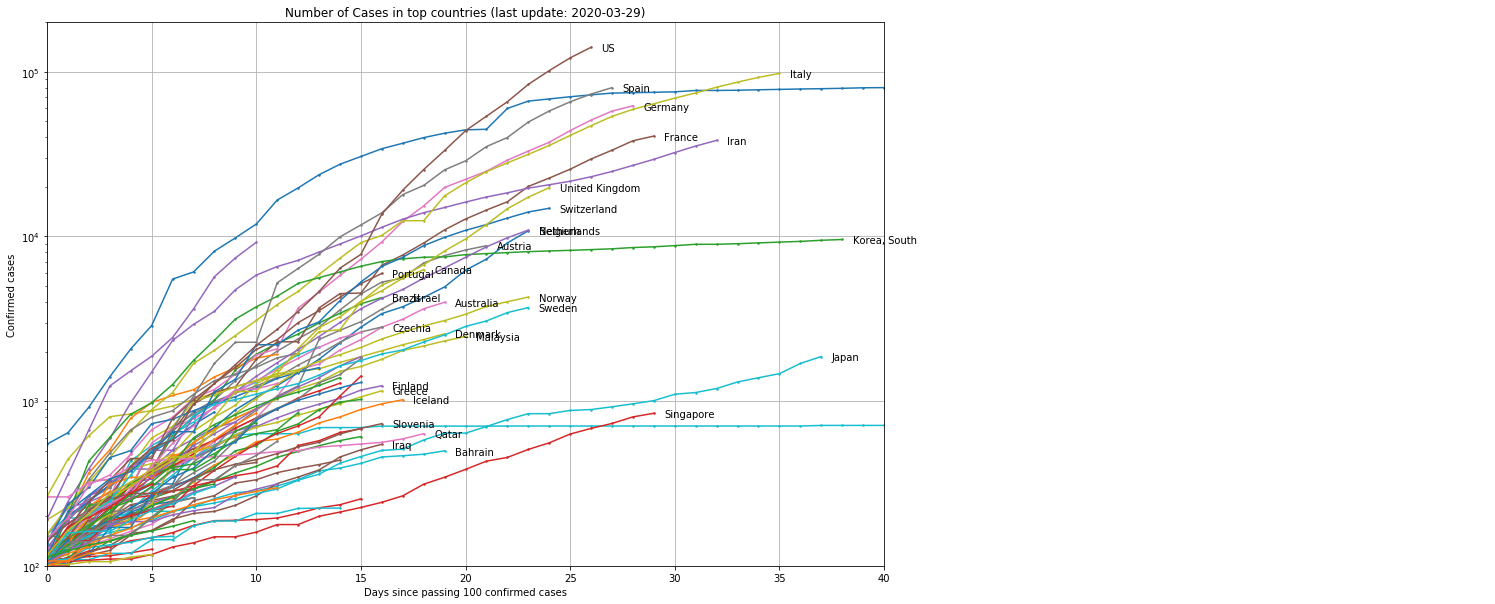

In [4]:
fig, ax = plt.subplots(1,1 ,figsize=(15,10))
  
for country in threshold_countries:
    bool_country = df_country['Country/Region'] == country 
    df_pl = df_country[bool_country] 
    ax.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'.-' ,ms=3,lw=1.5, label=country )
     
    y = df_pl['Confirmed'].iloc[-1]*0.95
    x = df_pl['Delta C'].iloc[-1] + 0.5
    if x > 16:
        ax.annotate( country ,[x,y])
    
ax.set_yscale('log') 
ax.grid(True,which="major", linestyle='-')  
ax.set_title('Number of Cases in top countries (last update: ' + str( df_country['Date'].iloc[-1]) + ')' ) 
# ax.set_xlim([0,70])
ax.set_xlim([0,40])
ax.set_ylim([100,2e5])

ax.set_xlabel("Days since passing 100 confirmed cases") 
ax.set_ylabel("Confirmed cases") 

# # # # # save fig  -----------------------------------------------------------------------
fig_name= 'covid_country_caseslog'
save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            ) 

# plot deaths 

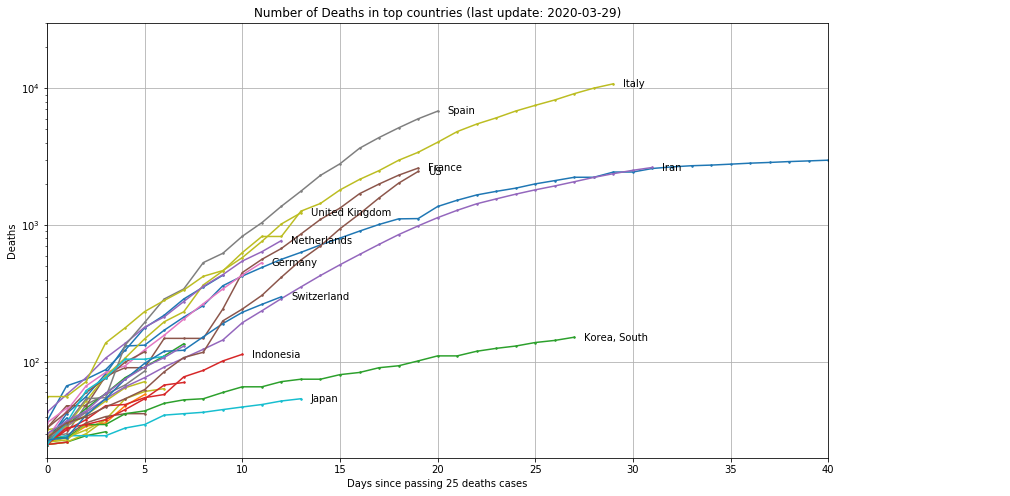

In [11]:
fig, ax = plt.subplots(1,1 ,figsize=(14,8))

for country in threshold_countries:
    bool_country = df_country['Country/Region'] == country 
    df_pl = df_country[bool_country] 
    ax.plot( df_pl['Delta D' ],  df_pl['Death'],'.-' ,ms=3,lw=1.5, label=country )
     
    y = df_pl['Death'].iloc[-1]*0.95
    x = df_pl['Delta D'].iloc[-1] + 0.5
    if x > 10:
        ax.annotate( country ,[x,y])
    
ax.set_yscale('log') 
ax.grid(True,which="major", linestyle='-')  
ax.set_title('Number of Deaths in top countries (last update: ' + str(df_country['Date'].iloc[-1]) + ')' ) 
ax.set_xlim([0,40])
ax.set_ylim([20,3e4])
ax.set_xlabel("Days since passing 25 deaths cases") 
ax.set_ylabel("Deaths")

# # # # # save fig  -----------------------------------------------------------------------
fig_name= 'covid_country_deathslog'
save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            ) 

# plot cases with highlight

Text(0, 0.5, 'Confirmed cases')

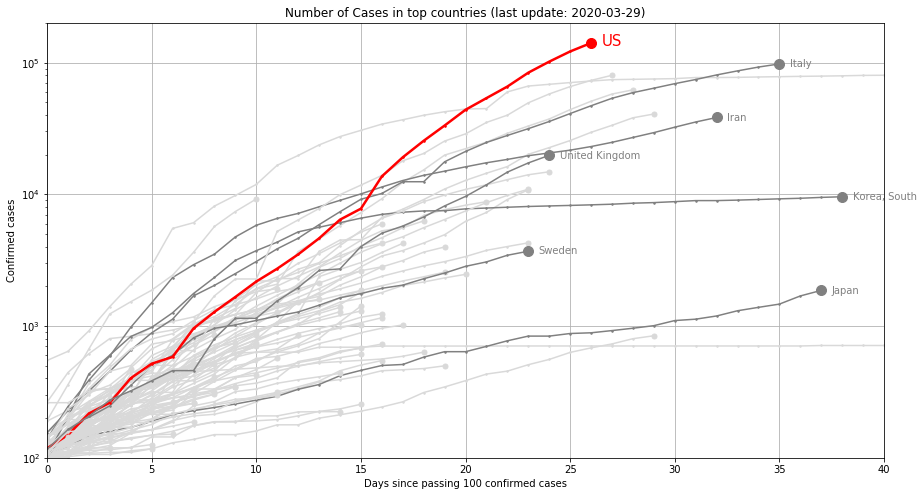

In [6]:
fig, ax = plt.subplots(1,1 ,figsize=(15,8))

dot_col = np.ones((3))*0.85 
emph_col = np.ones((3))*0.5
goal_col = 'red'

dot_alpha = 1
goal_country = 'US'
# goal_country = 'Italy'
notable_countries = ['US','Japan','Italy','Iran','Korea, South','United Kingdom','Sweden']


for country in threshold_countries:
#     print(country)
    if country == goal_country:
        bool_country = df_country['Country/Region'] == country 
        df_pl = df_country[bool_country] 
        ax.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'.-' ,
                ms=3,lw=2.5, label=country, 
                color=goal_col ,alpha = dot_alpha)
        ax.plot( df_pl['Delta C' ].iloc[-1],  df_pl['Confirmed'].iloc[-1],
                '.', ms =20 ,
                color=goal_col,alpha = dot_alpha)  
        
        y = df_pl['Confirmed'].iloc[-1]*0.95
        x = df_pl['Delta C'].iloc[-1] + 0.5
        if x > 16:
            ax.annotate( country ,[x,y], color=goal_col, fontsize = 15)
            
    elif country in notable_countries:
        bool_country = df_country['Country/Region'] == country 
        df_pl = df_country[bool_country] 
        ax.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'.-' ,
                ms=3,lw=1.5, label=country, 
                color=emph_col  )
        ax.plot( df_pl['Delta C' ].iloc[-1],  df_pl['Confirmed'].iloc[-1],
                '.', ms =20 ,
                color=emph_col )
        
        
        y = df_pl['Confirmed'].iloc[-1]*0.95
        x = df_pl['Delta C'].iloc[-1] + 0.5
        if x > 16:
            ax.annotate( country ,[x,y], color=emph_col, fontsize = 10)

    else:
        bool_country = df_country['Country/Region'] == country 
        df_pl = df_country[bool_country] 
        ax.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'.-' ,
                ms=3,lw=1.5, label=country, 
                color=dot_col ,alpha = dot_alpha)
        ax.plot( df_pl['Delta C' ].iloc[-1],  df_pl['Confirmed'].iloc[-1],
                '.', ms =10 ,
                color=dot_col,alpha = dot_alpha)
    
    
#     y = df_pl['Confirmed'].iloc[-1]*0.95
#     x = df_pl['Delta C'].iloc[-1] + 0.5
#     if x > 16:
#         ax.annotate( country ,[x,y])
    
ax.set_yscale('log') 
ax.grid(True,which="major", linestyle='-')  
ax.set_title('Number of Cases in top countries (last update: ' + str( df_country['Date'].iloc[-1]) + ')' ) 
# ax.set_xlim([0,70])
ax.set_xlim([0,40])
ax.set_ylim([100,2e5])

ax.set_xlabel("Days since passing 100 confirmed cases") 
ax.set_ylabel("Confirmed cases") 

# prepare plot parameters

In [7]:
# sort countries by confirmed cases on last date
bool_last = df_country['Date'] == df_country['Date'].max()
sorted_countries = df_country[bool_last].sort_values(by=['Confirmed'], ascending=False )    
sorted_countries.head(5)  

sorted_names = sorted_countries['Country/Region'].tolist()

sorted_names[:5]

['US', 'Italy', 'China', 'Spain', 'Germany']

In [8]:
china_correct = 47

last_day = df_country['Date'].unique()[-1] 
# bool_last = df_country['Date'] == last_day 
bool_cases= df_country['Delta C'] > china_correct
bool_deaths = df_country['Delta D'] > china_correct
bool_china = df_country['Country/Region'] == 'China'

df_country.loc[bool_cases & bool_china,'Delta C'] = china_correct
df_country.loc[bool_deaths & bool_china,'Delta D'] = china_correct

# plot top cases

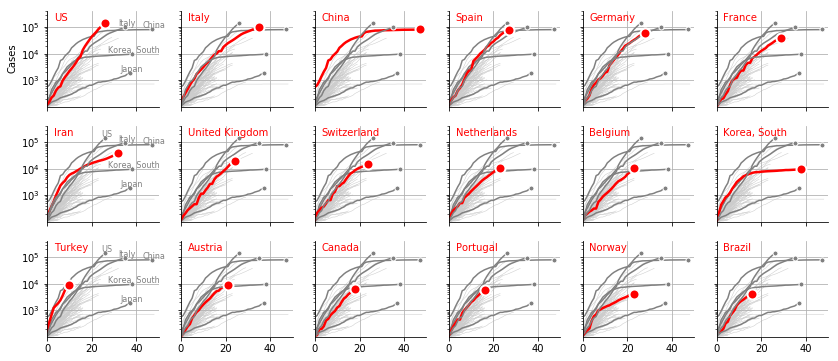

In [9]:
dot_col = np.ones((3))*0.8 
emph_col = [0.5,0.5,0.5]
goal_col = 'red'

notable_countries = ['US','Japan','China','Italy' ,'Korea, South' ]

def plot_highlight( ax_p, goal_country, df_country_pl):
    
    cmax = df_country_pl['Confirmed'].max()

    for country in threshold_countries:
    #     print(country)
        if country == goal_country:
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'-' ,
                    ms=3,lw=2.5, label=country, 
                    color=goal_col ,alpha = dot_alpha) 
            ax_p.scatter( df_pl['Delta C' ].iloc[-1],  df_pl['Confirmed'].iloc[-1], 100, goal_col,
                         edgecolors='w',zorder = 5, linewidths=2)  
            
            ax_p.annotate( country ,[3,cmax*1.2], color=goal_col, fontsize = 10,zorder = 5)
            
        elif country in notable_countries:
#             print(country)
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'-' ,
                    ms=3,lw=1.5, label=country, 
                    color=emph_col ,zorder = 2 ) 
            ax_p.plot( df_pl['Delta C' ].iloc[-1],  df_pl['Confirmed'].iloc[-1], marker='.',
                      markersize=10, markerfacecolor=emph_col , 
                    markeredgecolor='w',markeredgewidth=1,zorder =3 ) 
        else:
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta C' ],  df_pl['Confirmed'],'-' ,
                    ms=3,lw=.5, label=country, 
                    color=dot_col ,alpha = dot_alpha,zorder = 1) 
             
    ax_p.set_yscale('log') 
    ax_p.set_xlim([0,50])
    ax_p.set_ylim([100,cmax*3])
    
    return ax_p

dy = 3
dx = 6
fig, ax = plt.subplots( dy,dx ,figsize=(14,6))
 
for i, (ax_1, goal_country) in enumerate( zip(ax.reshape(-1), sorted_names[:(dy*dx)])): 
    ax_1 = plot_highlight(ax_1, goal_country, df_country)  
    ax_1 .grid(True )  
    
    if np.mod(i,dx) ==0:
        for country in threshold_countries:
            if (country in notable_countries) &( country not in goal_country):
                bool_country = df_country['Country/Region'] == country 
                df_pl = df_country[bool_country] 

                y = df_pl['Confirmed'].iloc[-1]*1.1
                x = df_pl['Delta C'].iloc[-1] + 1 
                ax_1.annotate( country ,[x,y], color=emph_col, fontsize = 8, ha='center')
    else: 
        ax_1.axes.get_yaxis().set_ticklabels([])
    if i< (dy-1)*dx:
        ax_1.axes.get_xaxis().set_ticklabels([])
        
        
    ax_1.axes.get_yaxis().set_ticks([1e3,1e4,1e5])
    ax_1.spines['top'].set_visible(False)
    ax_1.spines['right'].set_visible(False)
    
ax[0,0].set_ylabel('Cases')


# # # # # save fig  -----------------------------------------------------------------------
fig_name= 'covid_country_casesHighlightLog'
save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )  

 # plot deaths 

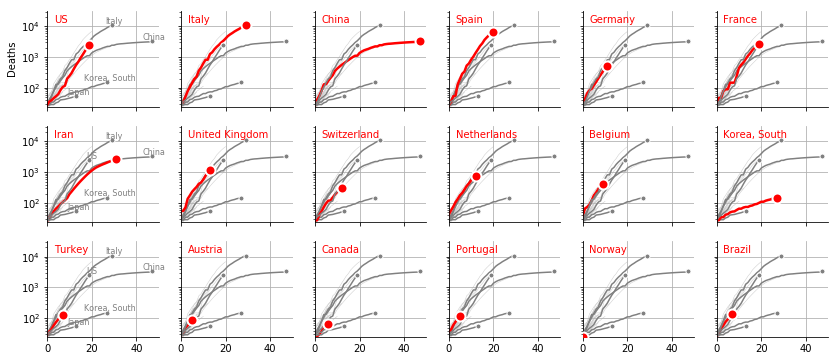

In [12]:
dot_col = np.ones((3))*0.8 
emph_col = [0.5,0.5,0.5]
goal_col = 'red'

notable_countries = ['US','Japan','China','Italy' ,'Korea, South' ]

def plot_highlight( ax_p, goal_country, df_country_pl):
    
    cmax = df_country_pl['Death'].max()

    for country in threshold_countries:
    #     print(country)
        if country == goal_country:
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta D' ],  df_pl['Death'],'-' ,
                    ms=3,lw=2.5, label=country, 
                    color=goal_col ,alpha = dot_alpha) 
            ax_p.scatter( df_pl['Delta D' ].iloc[-1],  df_pl['Death'].iloc[-1], 100, goal_col,
                         edgecolors='w',zorder = 5, linewidths=2)  
            
            ax_p.annotate( country ,[3,cmax*1.2], color=goal_col, fontsize = 10,zorder = 5)
            
        elif country in notable_countries:
#             print(country)
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta D' ],  df_pl['Death'],'-' ,
                    ms=3,lw=1.5, label=country, 
                    color=emph_col ,zorder = 2 ) 
            ax_p.plot( df_pl['Delta D' ].iloc[-1],  df_pl['Death'].iloc[-1], marker='.',
                      markersize=10, markerfacecolor=emph_col , 
                    markeredgecolor='w',markeredgewidth=1,zorder =3 ) 
        else:
            bool_country = df_country_pl['Country/Region'] == country 
            df_pl = df_country_pl[bool_country] 
            ax_p.plot( df_pl['Delta D' ],  df_pl['Death'],'-' ,
                    ms=3,lw=.5, label=country, 
                    color=dot_col ,alpha = dot_alpha,zorder = 1) 
             
    ax_p.set_yscale('log') 
    ax_p.set_xlim([0,50])
    ax_p.set_ylim([25,cmax*3])
    
    return ax_p

dy = 3
dx = 6
fig, ax = plt.subplots( dy,dx ,figsize=(14,6))
 
for i, (ax_1, goal_country) in enumerate( zip(ax.reshape(-1), sorted_names[:(dy*dx)])): 
    ax_1 = plot_highlight(ax_1, goal_country, df_country)  
    ax_1 .grid(True )  
    
    if np.mod(i,dx) ==0:
        for country in threshold_countries:
            if (country in notable_countries) &( country not in goal_country):
                bool_country = df_country['Country/Region'] == country 
                df_pl = df_country[bool_country] 

                y = df_pl['Death'].iloc[-1]*1.1
                x = df_pl['Delta D'].iloc[-1] + 1 
                ax_1.annotate( country ,[x,y], color=emph_col, fontsize = 8, ha='center')
    else: 
        ax_1.axes.get_yaxis().set_ticklabels([])
    if i< (dy-1)*dx:
        ax_1.axes.get_xaxis().set_ticklabels([])
        
        
    ax_1.axes.get_yaxis().set_ticks([1e2,1e3,1e4 ])
    ax_1.spines['top'].set_visible(False)
    ax_1.spines['right'].set_visible(False)
ax[0,0].set_ylabel('Deaths')


# # # # # save fig  -----------------------------------------------------------------------
fig_name= 'covid_country_deathsHighlightLog'
save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )  